In [1]:
# Importing libraries
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, classification_report
from sklearn.model_selection import train_test_split

In [2]:
messages = pd.read_csv("SMSSpamCollection.txt",sep='\t',names=["label","message"])

In [3]:
messages

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [4]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [5]:
ps = PorterStemmer()
lem = WordNetLemmatizer()

In [6]:
corpus_ps=[]
corpus_lem=[]

### Using Stemming and Evaluating the model

In [7]:
# Text Pre-Processing
for i in range(0, len(messages)):
    review = re.sub('[^a-zA-Z]',' ',messages['message'][i])
    review = review.lower()
    review = review.split()
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus_ps.append(review)

In [8]:
corpus_ps

['go jurong point crazi avail bugi n great world la e buffet cine got amor wat',
 'ok lar joke wif u oni',
 'free entri wkli comp win fa cup final tkt st may text fa receiv entri question std txt rate c appli',
 'u dun say earli hor u c alreadi say',
 'nah think goe usf live around though',
 'freemsg hey darl week word back like fun still tb ok xxx std chg send rcv',
 'even brother like speak treat like aid patent',
 'per request mell mell oru minnaminungint nurungu vettam set callertun caller press copi friend callertun',
 'winner valu network custom select receivea prize reward claim call claim code kl valid hour',
 'mobil month u r entitl updat latest colour mobil camera free call mobil updat co free',
 'gonna home soon want talk stuff anymor tonight k cri enough today',
 'six chanc win cash pound txt csh send cost p day day tsandc appli repli hl info',
 'urgent week free membership prize jackpot txt word claim c www dbuk net lccltd pobox ldnw rw',
 'search right word thank breather

In [9]:
len(corpus_ps)

5572

In [10]:
y = pd.get_dummies(messages['label'])
print(y)
y = y.iloc[:,1].values
print(y)

      ham  spam
0       1     0
1       1     0
2       0     1
3       1     0
4       1     0
...   ...   ...
5567    0     1
5568    1     0
5569    1     0
5570    1     0
5571    1     0

[5572 rows x 2 columns]
[0 0 1 ... 0 0 0]


In [11]:
messages['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [12]:
y=messages['label']
y

0        ham
1        ham
2       spam
3        ham
4        ham
        ... 
5567    spam
5568     ham
5569     ham
5570     ham
5571     ham
Name: label, Length: 5572, dtype: object

[[950   5]
 [  8 152]]
0.9883408071748879
              precision    recall  f1-score   support

         ham       0.99      0.99      0.99       955
        spam       0.97      0.95      0.96       160

    accuracy                           0.99      1115
   macro avg       0.98      0.97      0.98      1115
weighted avg       0.99      0.99      0.99      1115



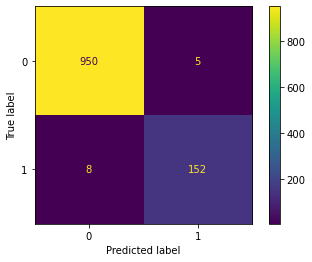

In [13]:
# Splitting dataset
X_train, X_test, y_train, y_test = train_test_split(corpus_ps,y,test_size=0.2, random_state=0)

# Using Bag of words
cv = CountVectorizer(max_features=2500)
X_train = cv.fit_transform(X_train).toarray()
X_test = cv.transform(X_test)


# Using Multinomial Naive Bayes
spam_detect_model = MultinomialNB().fit(X_train,y_train)
y_pred = spam_detect_model.predict(X_test)

# Evaluating the model
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
cm_display = ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred)).plot()

[[955   0]
 [ 26 134]]
0.9766816143497757
              precision    recall  f1-score   support

         ham       0.97      1.00      0.99       955
        spam       1.00      0.84      0.91       160

    accuracy                           0.98      1115
   macro avg       0.99      0.92      0.95      1115
weighted avg       0.98      0.98      0.98      1115



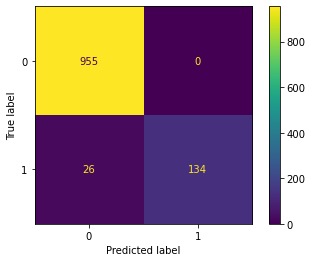

In [14]:
# Splitting dataset
X_train, X_test, y_train, y_test = train_test_split(corpus_ps,y,test_size=0.2, random_state=0)

# Using TF-IDF
cv = TfidfVectorizer(max_features=2500)
X_train = cv.fit_transform(X_train).toarray()
X_test = cv.transform(X_test)


# Using Multinomial Naive Bayes
spam_detect_model = MultinomialNB().fit(X_train,y_train)
y_pred = spam_detect_model.predict(X_test)

# Evaluating the model
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
cm_display = ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred)).plot()

### Using Lemmatization and Evaluating the model

In [15]:
# Text Pre-Processing
for i in range(0, len(messages)):
    review = re.sub('[^a-zA-Z]',' ',messages['message'][i])
    review = review.lower()
    review = review.split()
    review = [lem.lemmatize(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus_lem.append(review)

In [16]:
corpus_lem

['go jurong point crazy available bugis n great world la e buffet cine got amore wat',
 'ok lar joking wif u oni',
 'free entry wkly comp win fa cup final tkts st may text fa receive entry question std txt rate c apply',
 'u dun say early hor u c already say',
 'nah think go usf life around though',
 'freemsg hey darling week word back like fun still tb ok xxx std chgs send rcv',
 'even brother like speak treat like aid patent',
 'per request melle melle oru minnaminunginte nurungu vettam set callertune caller press copy friend callertune',
 'winner valued network customer selected receivea prize reward claim call claim code kl valid hour',
 'mobile month u r entitled update latest colour mobile camera free call mobile update co free',
 'gonna home soon want talk stuff anymore tonight k cried enough today',
 'six chance win cash pound txt csh send cost p day day tsandcs apply reply hl info',
 'urgent week free membership prize jackpot txt word claim c www dbuk net lccltd pobox ldnw rw'

[[948   7]
 [ 11 149]]
0.9838565022421525
              precision    recall  f1-score   support

         ham       0.99      0.99      0.99       955
        spam       0.96      0.93      0.94       160

    accuracy                           0.98      1115
   macro avg       0.97      0.96      0.97      1115
weighted avg       0.98      0.98      0.98      1115



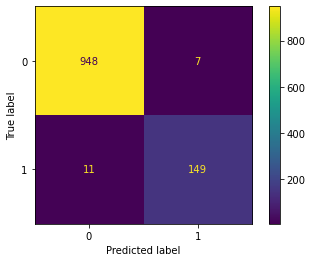

In [17]:
# Splitting dataset
X_train, X_test, y_train, y_test = train_test_split(corpus_lem,y,test_size=0.2, random_state=0)

# Using Bag of words
cv = CountVectorizer(max_features=2500)
X_train = cv.fit_transform(X_train).toarray()
X_test = cv.transform(X_test)


# Using Multinomial Naive Bayes
spam_detect_model = MultinomialNB().fit(X_train,y_train)
y_pred = spam_detect_model.predict(X_test)

# Evaluating the model
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
cm_display = ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred)).plot()

[[954   1]
 [ 25 135]]
0.9766816143497757
              precision    recall  f1-score   support

         ham       0.97      1.00      0.99       955
        spam       0.99      0.84      0.91       160

    accuracy                           0.98      1115
   macro avg       0.98      0.92      0.95      1115
weighted avg       0.98      0.98      0.98      1115



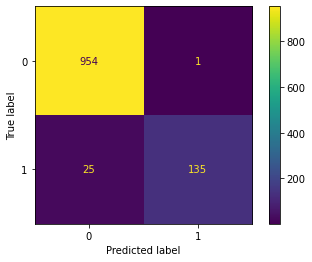

In [18]:
# Splitting dataset
X_train, X_test, y_train, y_test = train_test_split(corpus_lem,y,test_size=0.2, random_state=0)

# Using TF-IDF
cv = TfidfVectorizer(max_features=2500)
X_train = cv.fit_transform(X_train).toarray()
X_test = cv.transform(X_test)


# Using Multinomial Naive Bayes
spam_detect_model = MultinomialNB().fit(X_train,y_train)
y_pred = spam_detect_model.predict(X_test)

# Evaluating the model
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
cm_display = ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred)).plot()

After text pre-processing and evaluating the model using bag of words and TF-IDF, we found that doing stemming and evaluating the model using TF-IDF is yielding highest precision of 100%.